# TP1 Code Files part 1 - Hachem Squalli Elhoussaini

## Fichiers de code du TP1

### code-1.py

1.	Calculez la réponse impulsionnelle (RI), sur le papier, en fonction de b0 et b1, en supposant le système causal, et les conditions initiales éventuelles nulles

La réponse impulsionnelle est donc :
 
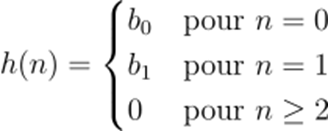

3.	Calculer et visualiser la réponse impulsionnelle pour a = -0.8 a = 0.99 et a = 1.01. Il pour être utile de définir une fonction qui rend directement la réponse impulsionnelle. Conclusions. 
 
=> Quand a>1, il faut éviter ce filtre car il va amplifier le signal d’entré. => a doit être entre 0.8 et 0.1 


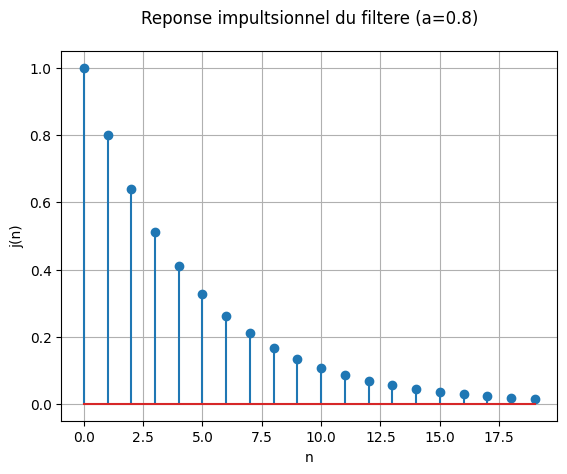

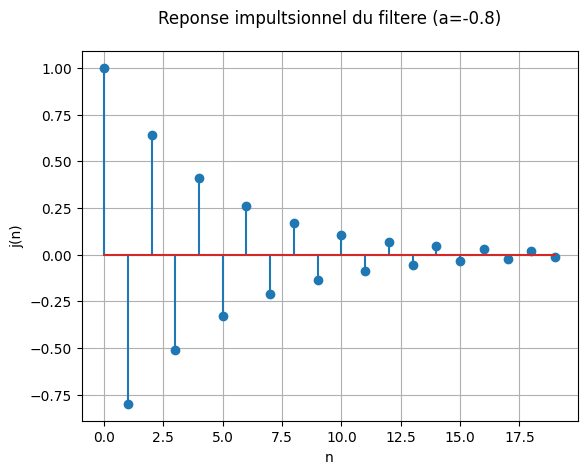

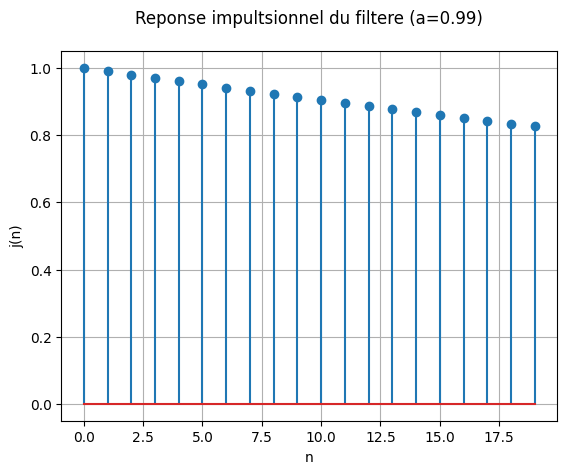

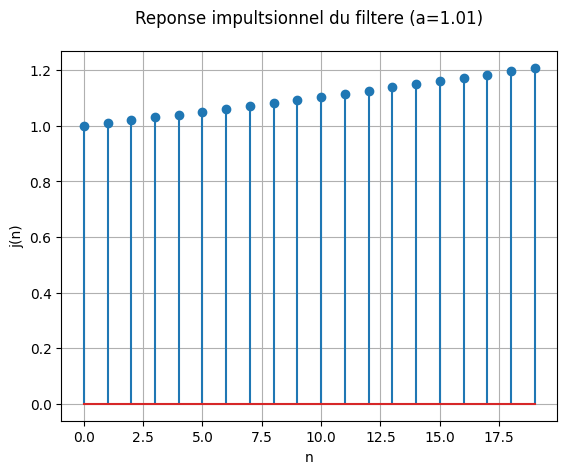

In [48]:
import numpy as np 
import scipy.signal
import matplotlib.pyplot as plt

#------------------etude temporel------------------------
N=20

dirac = np.zeros(N)
dirac[0] = 1

b=[1] #numerator


for i in [0.8,-0.8,0.99,1.01]:
    a = i

    den = [1,-a]#denominator

    h =  scipy.signal.lfilter(b,den,dirac)

    plt.stem(range(N),h)


    plt.title(f"Reponse impultsionnel du filtere (a={i})", pad=20)
    plt.xlabel('n')
    plt.ylabel('j(n)')
    plt.grid(True)
    plt.show()



---

### code-2.py

# Étude fréquentielle

### 1. Fonction de transfert en z

Donner l’expression de la fonction de transfert en **z** correspondant à cette équation aux différences :  
$$
H(z) = \frac{1}{1 - ae^{-j2\pi f}}
$$

---

### 2. Fonction de transfert H(f) et module |H(f)|

L’expression de la fonction de transfert en fréquence est :
$$
H(f) = \frac{1}{1 - ae^{-j2\pi f}}
$$

Le module de cette fonction est donné par :
$$
|H(f)| = \frac{1}{\sqrt{1 - 2a\cos(2\pi f) + a^2}}
$$

---

### 3. Amplitudes théoriques

- **Pour** \( f = 0 \) :
  $$
  |H(0)| = \frac{1}{|1 - a|}
  $$

- **Pour** \( f = \frac{1}{2} \) :
  $$
  |H(1/2)| = \frac{1}{|1 + a|}
  $$


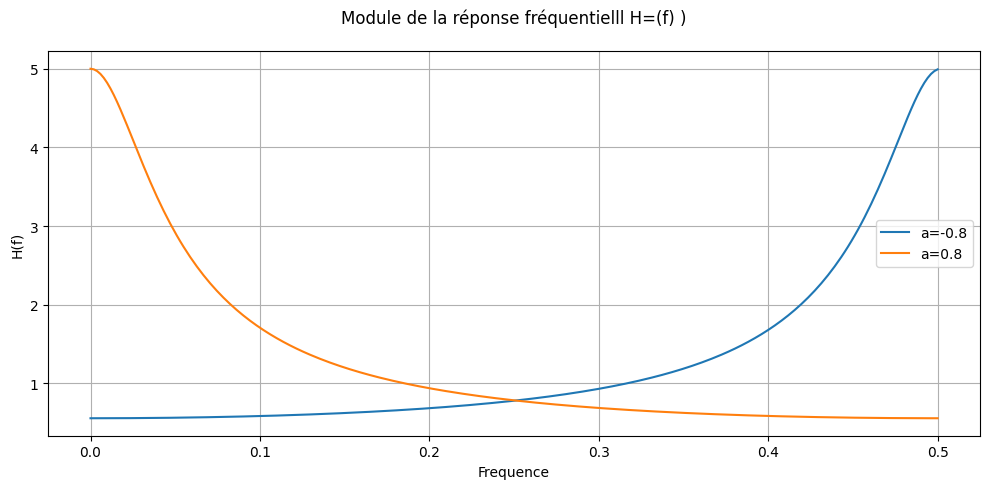

In [49]:
import numpy as np 
import scipy.signal
import matplotlib.pyplot as plt


fe = 32
Te = 1/fe  
a_values = [-0.8,0.8]
N=512

plt.figure(figsize=(10,5))
for a in a_values:
    #impulsion de dirac
    dirac = np.zeros(N)
    dirac[0] =1
    
    #Réponse impulsionnellle h(n)
    b =[1]
    den = [1,-a]#denominator
    h =  scipy.signal.lfilter(b,den,dirac)

    #Transformee de fourir 
    H =np.fft.fft(h)
    H = np.abs(H[:N//2]) #module + demi spectre (fréquence réelle)
    f =np.linspace(0,0.5,N//2) #axe des fréquences

    
    plt.plot(f,H,label=f'a={a}')



plt.title(f"Module de la réponse fréquentielll H=(f) )", pad=20)
plt.xlabel('Frequence')
plt.ylabel('H(f)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()






---

### code-3-1.py

# Filtrage

### 1. Équation de filtrage

L’équation du filtre est donnée par :  
$$
y(n) = a \cdot y(n-1) + x(n)
$$

---

### 2. Création d’une sinusoïde

On souhaite créer une sinusoïde \( x(n) \) de fréquence \( f_0 = 3 \, \text{Hz} \), échantillonnée à une fréquence \( F_e = 32 \, \text{Hz} \), sur \( N = 128 \) points.

Le signal est défini par :  
$$
x(n) = \sin\left(2\pi f_0 \cdot \frac{n}{F_e}\right), \quad n = 0, 1, \dots, 127
$$

---

### 3. Paramètres

- Fréquence de la sinusoïde : \( f_0 = 3 \, \text{Hz} \)
- Fréquence d’échantillonnage : \( F_e = 32 \, \text{Hz} \)
- Nombre d’échantillons : \( N = 128 \)
- Coefficient du filtre : \( a \) (valeur à choisir, par exemple \( a = 0{,}9 \))

---

### 4. Objectif

Appliquer le filtre récursif à la sinusoïde et observer la réponse du système.


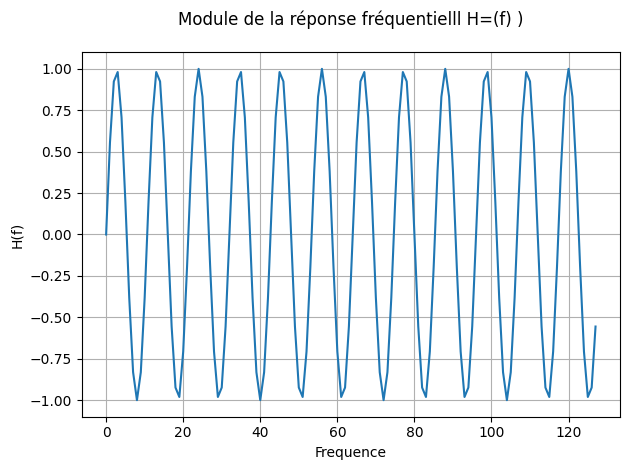

In [50]:
import numpy as np 
import scipy.signal
import matplotlib.pyplot as plt

N=128
fo=3
Fe=32

t= np.arange(N)/Fe


x = np.sin(2*np.pi*fo*t)

    
plt.plot(x)


plt.title(f"Module de la réponse fréquentielll H=(f) )", pad=20)
plt.xlabel('Frequence')
plt.ylabel('H(f)')
plt.grid(True)
plt.tight_layout()
plt.show()




---

### code-3-2.py

2.	Filtrer cette sinusoïde par le filtre précédent en utilisant la fonction lfilter :      => le filtre IIR représente un retard car il calcul les y(n-1) et présente une amplification de signal car il fait une accumulation des entrées passées ! 

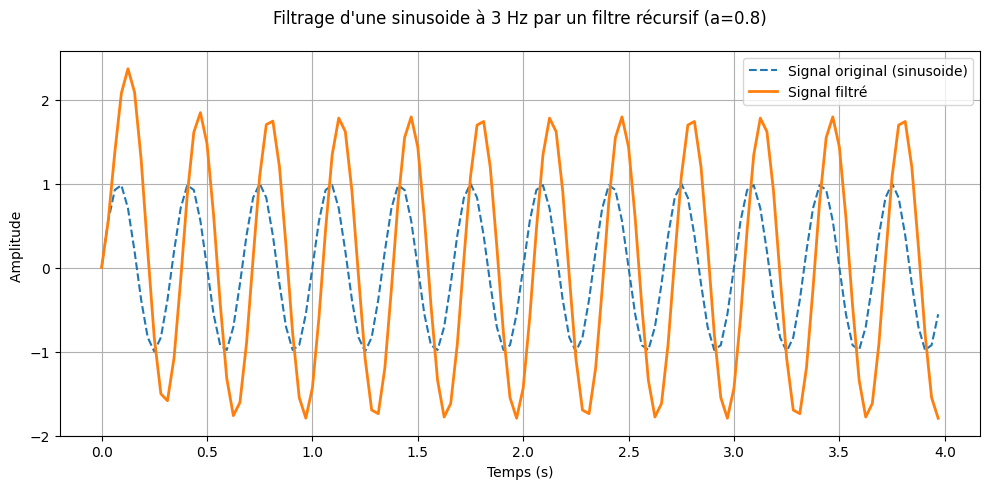

In [51]:
import numpy as np 
import scipy.signal
import matplotlib.pyplot as plt

N=128
fo=3
Fe=32
a=0.8

t= np.arange(N)/Fe


x = np.sin(2*np.pi*fo*t)




#application de filtre récursif
y1 = scipy.signal.lfilter([1],[1,-a],x)



#affichage
plt.figure(figsize=(10,5))
plt.plot(t,x,label="Signal original (sinusoide)",linestyle="--")
plt.plot(t,y1,label="Signal filtré",linewidth=2)

plt.title(f"Filtrage d'une sinusoide à 3 Hz par un filtre récursif (a=0.8)", pad=20)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude ')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



---

### code-3-3.py

3.	Filtrer cette sinusoïde par le filtre précédent : 
-	En utilisant une convolution : y2 = lfilter(h, [1], x) 
-	Expliquer pourquoi ce dernier calcul correspond effectivement à une convolution. 
Comparer graphiquement ces deux résultats. Afficher les deux courbes, voire la différence des courbes


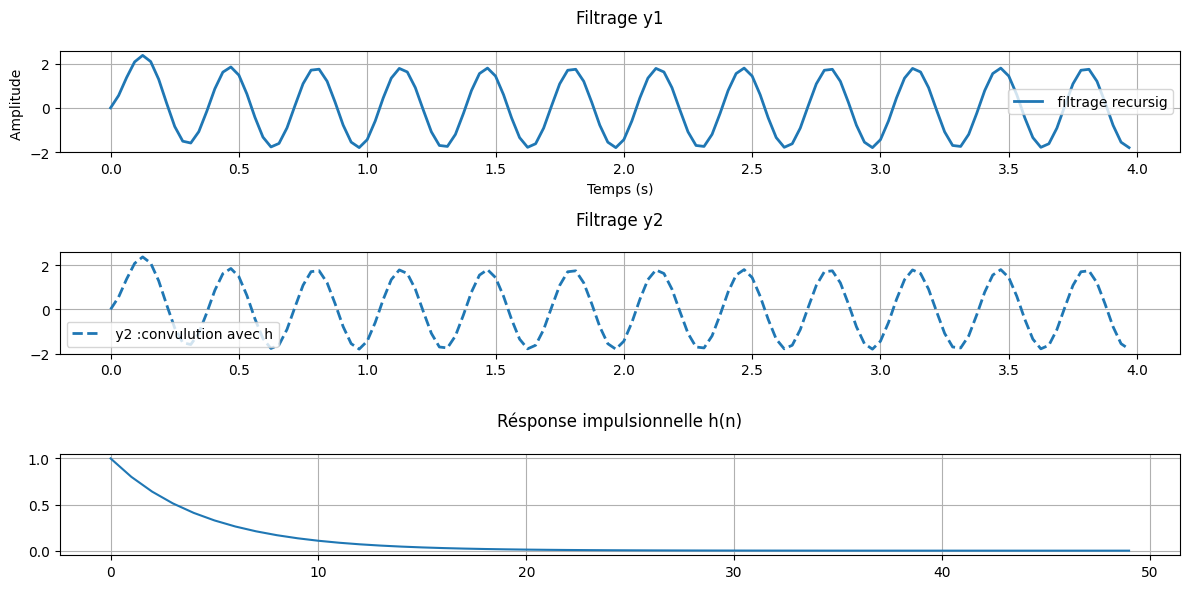

In [52]:
#Filtrage par convulution (en utilisatn lfilter comme FTR avec h)
import numpy as np 
import scipy.signal
import matplotlib.pyplot as plt

a = 0.8
N=20



N=128
fo=3
Fe=32
a=0.8
L=50
t= np.arange(N)/Fe

h = a**np.arange(L)



x = np.sin(2*np.pi*fo*t)




#application de filtre récursif
y1 = scipy.signal.lfilter([1],[1,-a],x)



y2= scipy.signal.lfilter(h,[1],x)

#affichage des resultat

#affichage
plt.figure(figsize=(12,6))

plt.subplot(3,1,1)
plt.plot(t,y1,label=" filtrage recursig",linewidth=2)
plt.title(f"Filtrage y1", pad=20)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude ')
plt.legend()
plt.grid(True)


plt.subplot(3,1,2)
plt.plot(t,y2[:N],"--",label=" y2 :convulution avec h",linewidth=2)
plt.title(f"Filtrage y2", pad=20)
plt.legend()
plt.grid(True)


plt.subplot(3,1,3)
plt.plot(np.arange(L),h)
plt.title(f"Résponse impulsionnelle h(n)", pad=20)
plt.grid(True)

plt.tight_layout()
plt.show()





---

### code-4.py

Les modules des transformées de Fourier du signal x et de la réponse impulsionnelle h :

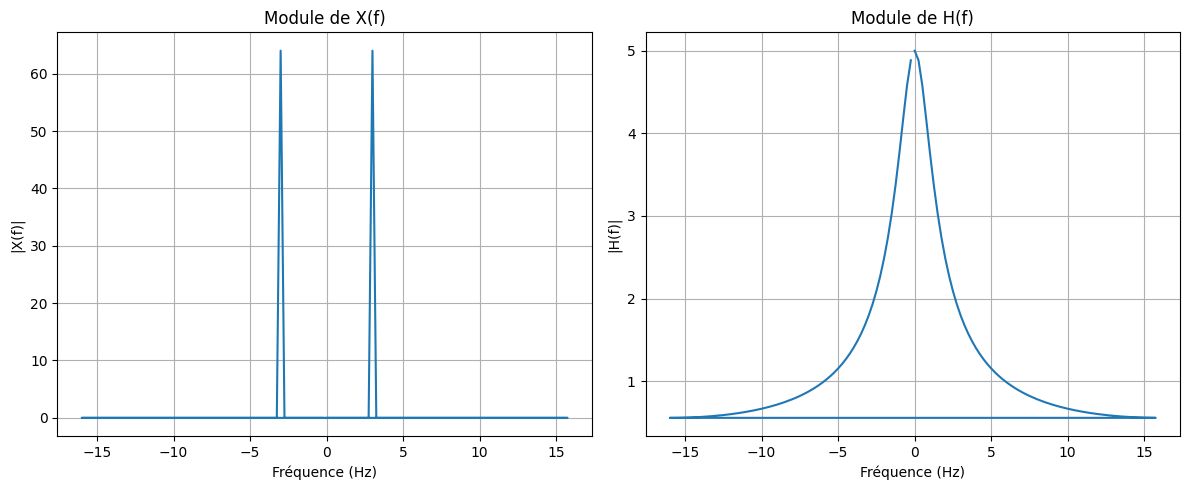

In [53]:
import numpy as np
import matplotlib.pyplot as plt

N = 128      
Fe = 32       

# Création d'un signal x 
t = np.arange(N)/Fe
x = np.sin(2*np.pi*3*t)

# Création de la réponse impulsionnelle h 
a = 0.8
h = a ** np.arange(N)

# Calcul des transformées de Fourier
X_f = np.fft.fft(x)    
H_f = np.fft.fft(h)   
f = np.fft.fftfreq(N, d=1/Fe) 

# Affichage
plt.figure(figsize=(12, 5))

# Module de X(f)
plt.subplot(1, 2, 1)
plt.plot(f, np.abs(X_f))
plt.title('Module de X(f)')
plt.xlabel('Fréquence (Hz)')
plt.ylabel('|X(f)|')
plt.grid()

# Module de H(f)
plt.subplot(1, 2, 2)
plt.plot(f, np.abs(H_f))
plt.title('Module de H(f)')
plt.xlabel('Fréquence (Hz)')
plt.ylabel('|H(f)|')
plt.grid()

plt.tight_layout()
plt.show()

---